# This code studies the quantum Shor algorithm.

Here is the link to the good descrition of the classical steps of the Shor algorithm:
   
   https://kaustubhrakhade.medium.com/shors-factoring-algorithm-94a0796a13b1

## Classical version of the Shor algorithm

2. Shortly the algorithm works as follows:

   a) Let's N is the number you need to factor

   b) Choose some random k number, k<N

   c) Check if they have common factrs using Euclid's algorithnm (see it later)

   d) If not, then find the 'period' r, using the following approach:

           s1. choose q=1, then find s=q*k mod N.

           s2. if s=1 then you are done calculate number of times you go through the loop. It would be r.

           s3. if not replace q with s and go to s1.

           s4. perfrom steps s1 to s3 until find r.


   e) if r is odd, chose another k and repeat the whole thing again.

   f) if r is even, then go to repetition r/2 in d) and take s from than step.

   g) find f1=GCD(s+1,N) and f2=GCD(s+2,N) these whould two factor of the N.

       Other option is to calculate GCD of N and a^(r/2) + 1. This would be a factor of N.



### Example of Euclid's algorithm
      -    GCD(21,35):    write 35 and 21
      -                    35-21=14
      -                     14  and 21
      -                             21-14=7
      -                     14  and 7
      -                 14-7=7
      -                     7   and 7
      -                     7 is the GCD
      - if you get 1 as the result, there is no  GCD other than 1.

## Quantum version of the Shor algorithm

The step of finding the period of the number a is changed to qauntum version. The rest is the same.

### The schematic of the period finding circuit
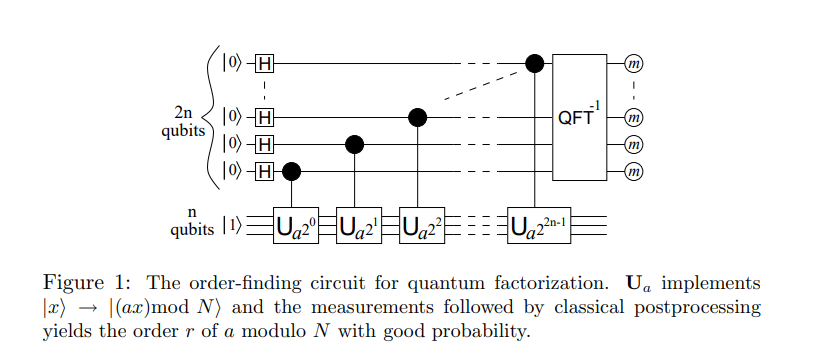

## Restrictions of the Shor algorithm

1) the algorithm does not work for N=x^y,

2) It does not work for even N,

3) does not work is N is a prime number

If N consists of multiple fators, f1*f2!=N, f1 and f2 will constains other factors of N.

## Notes on the notebook

1. Here you can factor number N = 15. In this case the bit size should be 4. For N = 21 bit_size should be 5.

2. for bit_size = 4 the quantum simulations takes few seconds. For N = 21 (bit_size = 5) the QC simulations take few minutes.
   
3. Quantum part is simulated but can be run on real QC.

4. Description of the order (period) finding quantum cirsuit and all the subcircuits can be found the Shor folder.

In [9]:
import numpy as np
import time
import sys
import math
sys.path
sys.path.insert(0, 'C:/Users/Oleg/Google Диск/QC/Codes/QC-qiskit-codes/Shor')
sys.path.insert(0, 'C:/Users/Oleg/Google Диск/QC/Codes/QC-qiskit-codes/Library')

import qiskit
from qiskit import QuantumRegister as Q_R
from qiskit import ClassicalRegister as C_R
from qiskit_aer import Aer
from qiskit_aer import AerSimulator
from qiskit import QuantumCircuit, transpile
from qiskit.visualization import plot_histogram


import quantum_routines as qr
import classical_routines as cr
import aux_func as af

## First classical part of the algorithm

In [77]:

N = 21 # this is the number we want to factor

bit_size = 5 # size of the binary nubers we use



a = 13 #choose some random number a < N and check if it has commen factor with N

gcd = cr.euclids_GCD(a, N)

print(['GCD of nubber N = ' + str(N) + ' and a = ' + str(a) + ' is ' + str(gcd)])
if gcd != 1:
    print('The problem is soved. number  N = ' + str(N) + ' has factor ' + str(gcd))
else:
    print('Need to process to the next step and find period of a mod N')


['GCD of nubber N = 21 and a = 13 is 1']
Need to process to the next step and find period of a mod N


## Finding period of a mod N using quantum computer

In [78]:
cl_num_a = cr.int_2_bin_str(a, bit_size)
cl_num_N = cr.int_2_bin_str(N, bit_size)
CU_gate_input = [0, 0, 0, 1]
q_num_b =  [0, 0, 0, 0]

cl_num_N_int = cr.bin_str_2int(cl_num_N)

CU_gate_input = [0] + CU_gate_input
q_num_b = [0] + q_num_b



q_reg_search = Q_R(2 * bit_size, 's') # control qubit
q_reg_x = Q_R(bit_size + 1, 'x') # quantum number x
q_reg_b = Q_R(bit_size + 1, 'b') # quantum number b

q_anc = Q_R(1, 'ancilla') # ancilla qubit

cl_reg_meas = C_R(2 * bit_size, 'meas') #classical register for measured number

OFC_circ = qiskit.QuantumCircuit(q_reg_search, q_reg_x, q_reg_b, q_anc, cl_reg_meas)

#preparing superposition state for period search
for qq in q_reg_search:
    OFC_circ.h(qq)

#preparing quantum inputs to CQA_gates
OFC_circ = qr.qubit_binary_prepare(q_reg_x, CU_gate_input, OFC_circ)

#preparing quantum number b
OFC_circ = qr.qubit_binary_prepare(q_reg_b, q_num_b, OFC_circ)

cl_num_a_curr = []
cl_num_a_curr[:] = cl_num_a[:]

gate = qr.CQA_gate(bit_size, cl_num_a_curr, cl_num_N)
qubits = [q_reg_search[0]]
for i in range(bit_size + 1):
    qubits.append(q_reg_x[i])
for i in range(bit_size + 1):
    qubits.append(q_reg_b[i])
qubits.append(q_anc)
OFC_circ.append(gate, qubits)

aa = cr.bin_str_2int(cl_num_a)
print(aa)

for i in range(1, 2 * bit_size): #2 * bit_size
    #preparing a-number multiplied by 2^i
  
    aa1 = (pow(aa , pow(2, i))) % cl_num_N_int
    print(aa1)
    cl_num_a_curr = cr.int_2_bin_str(aa1, bit_size)
    print(cl_num_a_curr)
    
    # Adding a QCA_gate
    gate = qr.CQA_gate(bit_size, cl_num_a_curr, cl_num_N)
    qubits = [q_reg_search[i]]
    for i in range(bit_size + 1):
        qubits.append(q_reg_x[i])
    for i in range(bit_size + 1):
        qubits.append(q_reg_b[i])
    qubits.append(q_anc)

    
    OFC_circ.append(gate, qubits)
    
gate = qr.IQFTn_instr(2 * bit_size)

OFC_circ.append(gate, q_reg_search)

OFC_circ = qr.qubits_meas(q_reg_search, cl_reg_meas, OFC_circ)

#OFC_circ.draw('mpl')

qubit_binary_prepare: Size of quantum number is bigger than that of classical, so the classical number extended by adding few highest bits
qubit_binary_prepare: Size of quantum number is bigger than that of classical, so the classical number extended by adding few highest bits
13
1
[0, 0, 0, 0, 1]
1
[0, 0, 0, 0, 1]
1
[0, 0, 0, 0, 1]
1
[0, 0, 0, 0, 1]
1
[0, 0, 0, 0, 1]
1
[0, 0, 0, 0, 1]
1
[0, 0, 0, 0, 1]
1
[0, 0, 0, 0, 1]
1
[0, 0, 0, 0, 1]


## Run quantum circuit

['Time elapsed for QC simulations: 210.46759176254272 sec']


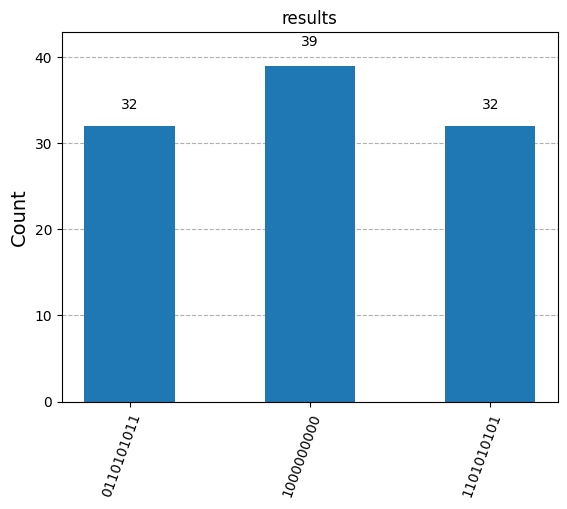

In [79]:
start = time.time()
shot_num = 10000
simulator = AerSimulator()
OFC_circ = transpile(OFC_circ, backend = simulator)
result = simulator.run(OFC_circ,shots = shot_num).result()
counts = result.get_counts(OFC_circ)
end = time.time()
print(['Time elapsed for QC simulations: ' + str(end - start) + ' sec'])
#af.plot_counts(counts, 2 * bit_size)
#print(counts)
#plot_histogram(counts, title = 'results')
counts_1 = counts.copy()
max_count = 0
for dic in counts:
    if counts[dic] > max_count:
        max_count = counts[dic]
for dic in counts:
    if counts[dic] < max_count*0.8:
        counts_1.pop(dic)
#print(counts[ans])
plot_histogram(counts_1, title = 'results')


In [62]:
#print(counts_1)

## Classical postprocessing of quantum data and factors finding

In [80]:
n_sol = 0
sol = []
for dic in counts_1:
    if int(dic,2)/pow(2,2 * bit_size) != 0:
        sol.append((int(dic,2)/pow(2,2 * bit_size)))
        n_sol = n_sol + 1

print(sol)
per = []
for i in range(n_sol):
    if 1/sol[i] == int(1/sol[i]):
        per.append(int(1/sol[i]))

print(per)
per_fin = 1000

for per_curr in per:
    if pow(a, per_curr) % N == 1 and per_curr < per_fin:
        per_fin = per_curr
print('Period is ' + str (per_fin))

if per_fin / 2 == int(per_fin / 2):
    gcd_1 = cr.euclids_GCD(pow(a, int(per_fin / 2)) + 1, N)
    #gcd_2 = cr.euclids_GCD(per_fin + 2, N)
    print('Factors are ' + str(gcd_1) + ', ' + str(int(N / gcd_1)) + '.')
else:
    print('Period is odd. Choose another a and try again until find even period.')

    

[0.5, 0.8330078125, 0.4169921875]
[2]
Period is 2
Factors are 7, 3.


4